pip install wordcloud --trusted-host pypi.org --trusted-host files.pythonhosted.org pandas_datareader

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:

# Load your stock price data
# Assuming you have a CSV file named 'stock_data.csv' with columns ['Date', 'Close']
data = pd.read_csv('stockdata.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [3]:
data.head(2)
data.shape

(260, 1)

In [4]:
# Check for missing values
print("Number of missing values:", data.isnull().sum().sum())

Number of missing values: 0


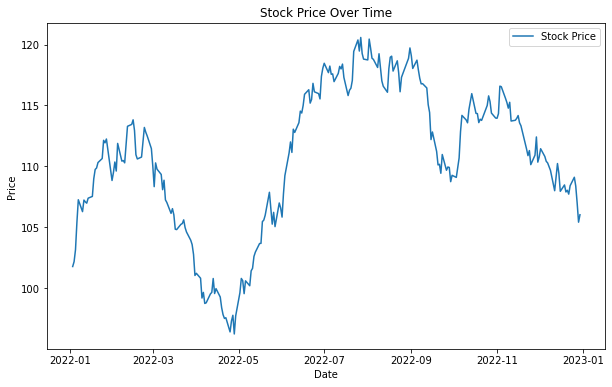

In [5]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Stock Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [6]:
# Check for stationarity using Augmented Dickey-Fuller test
adf_result = sm.tsa.adfuller(data['Close'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

ADF Statistic: -1.633311290790917
p-value: 0.46575793126617404
Critical Values: {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}


<Figure size 1296x432 with 0 Axes>

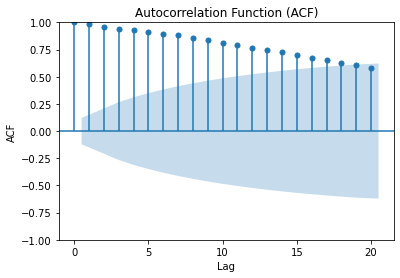

<Figure size 1296x432 with 0 Axes>

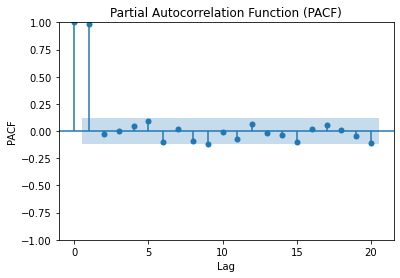

In [7]:
# Plot ACF and PACF to determine the lag order
plt.figure(figsize=(18, 6))
plot_acf(data['Close'], lags=20, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(18, 6))
plot_pacf(data['Close'], lags=20, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

In [8]:
# Choose the best lag using AIC
best_aic = np.inf
best_order = None

for p in range(1, 6):  # Maximum lag considered is 5
    model = sm.tsa.ARIMA(data['Close'], order=(p, 0, 0))
    results = model.fit()
    aic = results.aic
    if aic < best_aic:
        best_aic = aic
        best_order = (p, 0, 0)

print("Best AIC:", best_aic)
print("Best Order (p, d, q):", best_order)

C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Best AIC: 738.7069741881983
Best Order (p, d, q): (1, 0, 0)


In [9]:
# Fit the AR model with the best order
model = sm.tsa.ARIMA(data['Close'], order=best_order)
results = model.fit()

C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


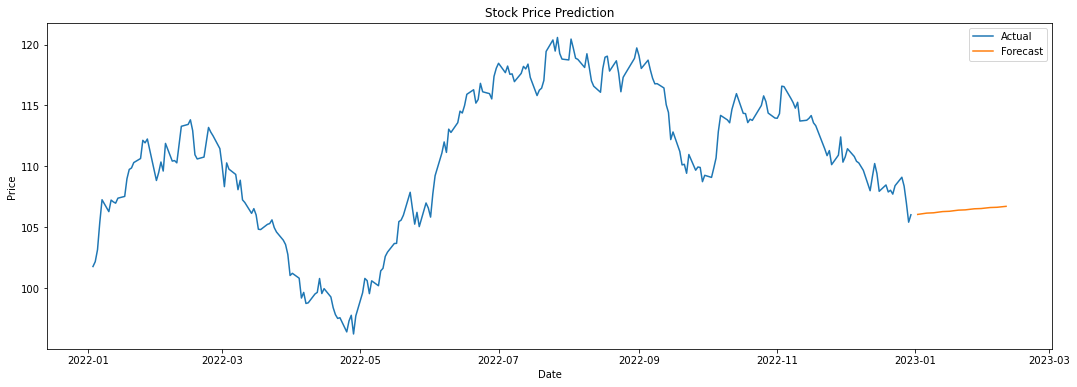

In [10]:

# If not stationary, apply differencing
# data_diff = data['Close'].diff().dropna()





# Predict future values
forecast_steps = 30
forecast = results.forecast(steps=forecast_steps)

# Visualize the results
plt.figure(figsize=(18, 6))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='B')[1:], forecast, label='Forecast')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
